In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch import nn

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.datasets import IamLinesDataset, AddTokens

In [3]:
transform = [{"type": "ToTensor", "args": None}, 
             {"type": "ApplyContrast", "args": {"low": 0.0, "high": 0.15}},
             #{"type": "RandomAffine", "args": {"degrees": [-0.25, 0.25], "scale": [0.98, 1.0]}}
            ]

In [4]:
dataset = IamLinesDataset(train=False, pad_token="_", transform=transform, lower=True)
dataset.load_or_generate_data()
print(dataset)

IAM Lines Dataset
Number classes: 54
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j', 20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't', 30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z', 36: ' ', 37: '!', 38: '"', 39: '#', 40: '&', 41: "'", 42: '(', 43: ')', 44: '*', 45: '+', 46: ',', 47: '-', 48: '.', 49: '/', 50: ':', 51: ';', 52: '?', 53: '_'}
Data: (1861, 28, 952)
Targets: (1861, 97)



In [5]:
dataset.input_shape

(28, 952)

In [6]:
dataset.output_shape

(97, 54)

In [7]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapper(int(i)) for i in y])

# convert_y_label_to_string(dataset.targets[0])

but since starting salaries would depend on grade a______________________________________________
or b in the finals next may, and since mating____________________________________________________
prospects would depend upon salaries, scholarship for____________________________________________
these fine young people was closely geared to____________________________________________________
economic and biological ends which, essentially,_________________________________________________
were really means. so, seeing them revolve in____________________________________________________
circles, harry had the feeling that moke (or what________________________________________________
moke consciously or unconsciously symbolised, any-_______________________________________________
way in harry's mind) had these splendid young____________________________________________________
people by the short hairs, and was diverting them ...____________________________________________


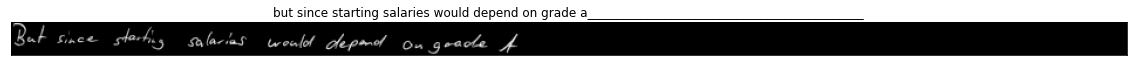

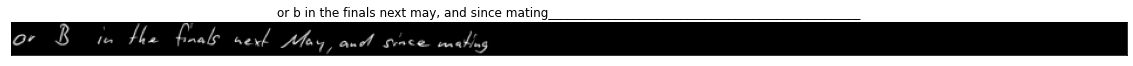

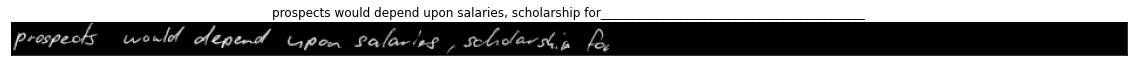

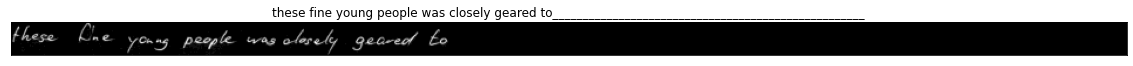

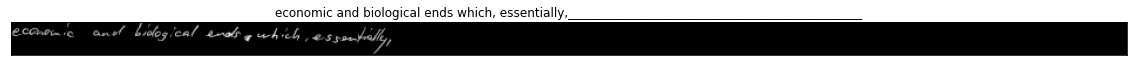

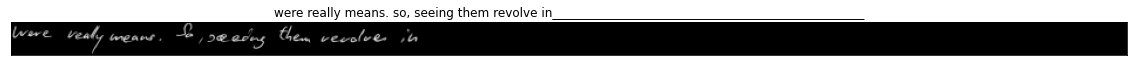

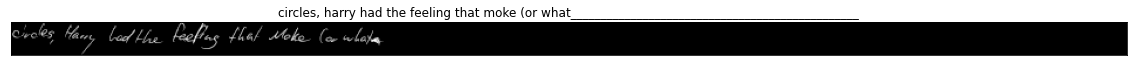

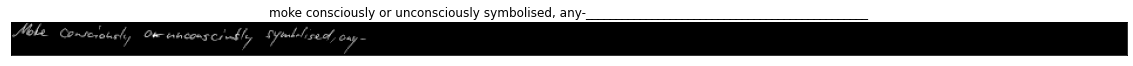

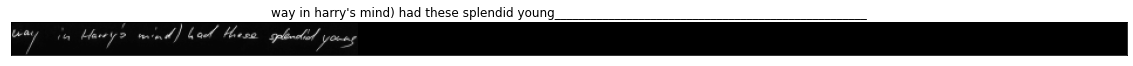

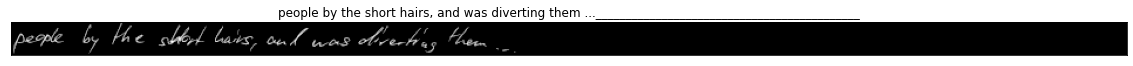

In [8]:
for i in range(190, 200):
    plt.figure(figsize=(20, 20))
    plt.xticks([])
    plt.yticks([])
    data, target = dataset[i]
    target = [x - 26 if x > 35 else x for x in target]
    sentence = convert_y_label_to_string(target, dataset) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0).numpy(), cmap='gray')

In [10]:
from text_recognizer.networks.util import sliding_window

In [41]:
data1 = torch.stack((data, data))

In [42]:
data1.shape

torch.Size([2, 1, 28, 952])

In [32]:
patches = sliding_window(data.unsqueeze(0), (28, 32), (1, 28))

In [52]:
patches = sliding_window(data1, (28, 32), (1, 28))

In [53]:
patches.shape

torch.Size([2, 33, 1, 28, 32])

In [48]:
patches = patches[1]

In [9]:
from einops import rearrange

In [54]:
p = rearrange(patches, "b t c h w -> (b t) c h w")

In [56]:
patches = rearrange(p, "(b t) c h w -> b c h (t w)", b=2)

In [57]:
patches.shape

torch.Size([2, 1, 28, 1056])

In [58]:
p.shape

torch.Size([66, 1, 28, 32])

In [11]:
data.shape

torch.Size([1, 28, 952])

In [37]:
p=7
x = rearrange(data.unsqueeze(0), 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = 28, p2 = p)

In [42]:
x.shape

torch.Size([1, 136, 196])

In [39]:
patches = rearrange(x, 'b t (h w) -> b t h w', h = 28, w = p)

In [28]:
patches = patches.squeeze(0)

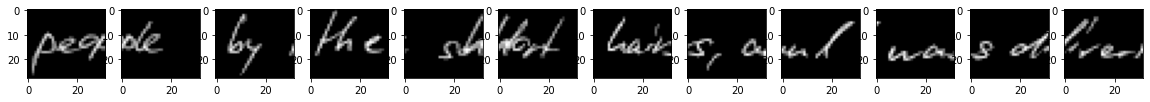

In [49]:
fig = plt.figure(figsize=(20, 20))
for i in range(12):
    ax = fig.add_subplot(1, 12, i + 1)
    ax.imshow(patches[i].squeeze(0), cmap='gray')